In [1]:
from mini_sim.mini_sim_v3 import *
import matplotlib.pyplot as plt
import json
%matplotlib inline
%load_ext autoreload
%autoreload 2


In [2]:
N_DAYS = 5
N_STEPS = int(N_DAYS * 24 * 60 * 60)
M = 100
N = 100
matchingTimeInterval = 20
numberOfDrivers = 150 # 250
totalTime = 500
verbose = True


In [3]:

x_M = np.arange(M)
y_M = np.sin(x_M / 15)
x_N = np.arange(N)
y_N = np.sin(x_N / 15)

temporalOneDay = np.sin(np.arange(24 * 3600) / 9000)
temporal = np.hstack([temporalOneDay for _ in range(N_DAYS)])
# temporal[:] = 1
spatialDistribDemandOccurance = np.multiply(y_M.reshape(-1, 1), y_N.reshape(1, -1))

x_M = np.arange(M)
y_M = np.cos(x_M / 50)
x_N = np.arange(N)
y_N = np.cos(x_N / 50)

spatialDistribDemandDropOff = np.multiply(y_M.reshape(-1, 1), y_N.reshape(1, -1))

DemandDistribs = {
    "spatialDistribDemandOccurance": spatialDistribDemandOccurance.reshape(-1,),
    "spatialDistribDemandDropOff": spatialDistribDemandDropOff.reshape(-1,),
    "TemporalDemandVariation": temporal,
}



In [4]:
def f(distr):
    p = distr.copy()
    p[p < 0] = 0
    p -= np.min(p)
    p /= np.sum(p)
    p = p.reshape(100, 100)
    return p

In [5]:
spatialDistribDemandDropOff.shape

(100, 100)

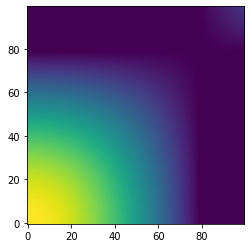

In [6]:
plt.imshow(f(spatialDistribDemandDropOff.reshape(-1,)), origin = 'lower')

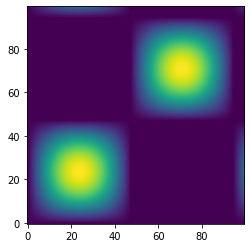

In [7]:
plt.imshow(f(spatialDistribDemandOccurance.reshape(-1,)), origin = 'lower')

### Case I: Model uses ETA minimization matching and learns LTSV (without using it)

In [8]:
env1 = Env(
    M, N, DemandDistribs,
    matchingTimeInterval, 
    numberOfDrivers, totalTime, verbose, costType = 1)


In [9]:
## 1. bigger network
## 3. smaller batch size and step size
## 5. activation is tanh
## 7. no temporal variations
## 8. discount = 1.0
## 9. gradiant clipped to 0.01
## 10.value update is not discounting reward or next state

In [10]:
d1 = list(env1.driversDict.keys())[0]

In [ ]:
### Each NN update loop is repeated 10 times!

for i in range(N_STEPS):
    env1.Step()
#     D1 = env1.driversDict[d1]
#     print(D1.idle, D1.beenIdleFor, D1.x, D1.y, D1.idleDestination)
    if i % (6 * 3600) == 0:
        print(f'time: {env1.currentTime / (24 * 3600)} - summary: {env1.summary.items()}')
        try:
            print(f'loss: {env1.lossHistory[-1]}')
        except:
            pass
    try:
        save_json(list(env1.lossHistory), 'loss')
        torch.save(env1.targetFunction.state_dict(), 'torchModel')
    except:
        pass

time: 1.1574074074074073e-05 - summary: dict_items([('total matched trips', 0), ('total completed trips', 0), ('total requests', 0), ('driver efficiency', 0.0), ('cancel rate', 1.0)])


/mnt/cephfs/hadoop-compute/phoenix/ssadeghi/miniSIM/mini_sim/mini_sim_v3.py:124: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  ../torch/csrc/utils/tensor_new.cpp:201.)
  batch_v1 = torch.tensor(batch_v1, dtype=torch.float)
/mnt/cephfs/hadoop-compute/phoenix/ssadeghi/miniSIM/mini_sim/mini_sim_v3.py:107: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  pred = self.targetFunction(torch.tensor(batch_x).float())


time: 0.2500115740740741 - summary: dict_items([('total matched trips', 34036), ('total completed trips', 23709), ('total requests', 47524), ('driver efficiency', 0.3084829406046017), ('cancel rate', 0.3034140322012008), ('total fare of completed trips', 175570.67822426307)])
loss: 0.993484616279602
time: 0.500011574074074 - summary: dict_items([('total matched trips', 55413), ('total completed trips', 38397), ('total requests', 84345), ('driver efficiency', 0.26558644475822324), ('cancel rate', 0.30707595690542056), ('total fare of completed trips', 304194.67500087916)])
loss: 0.7540408372879028


In [ ]:
# for i in range(10000):
#     if i % 100 == 0:
#         print(i)
#     env1.neuralNetworkStep()

In [ ]:
plt.semilogy(list(env1.lossHistory)[::10])

In [ ]:
torch.save(env1.targetFunction.state_dict(), 'torchModel')

In [ ]:
(2.7301e+04 % (24 * 3600)) / (24 * 3600)

In [ ]:
env1.memory.memory[0]

In [ ]:
env1.memory.memory[-2]

In [ ]:

plt.figure(figsize=(10,10))
for i, it in enumerate(env1.memory.memory):
    xs = [it.state1[0], it.state2[0]]
    ys = [it.state1[1], it.state2[1]]
#     plt.scatter(it.state1[0], it.state1[1], color = 'red')
#     plt.scatter(it.state2[0], it.state2[1], color = 'blue')
    if (it.state1[:2] == it.state2[:2]).all:
        plt.scatter(it.state1[0], it.state1[1], marker = '*', color = 'red')
    plt.plot(xs, ys, color = 'blue', alpha = 0.2)
    if i == 2000:
        break

In [ ]:
env1.memory.memory[10].state1

In [ ]:
env1.memory.memory[-3]

In [ ]:
env1.summary.items()

In [ ]:
for k, d in env1.driversDict.items():
    plt.scatter(d.x, d.y, c='red')
    
for k, d in env1.demandsDict.items():
    plt.scatter(d.x, d.y, c='blue')

In [ ]:
# plt.plot(meanValUpdate)
# plt.plot(sizes)

In [ ]:
plt.plot(temporal[:int(24 * 3600)]); plt.show()

# plt.plot(np.linspace(0,24,24 * 3600), temporal[:int(24 * 3600)])
# plt.xlabel('hour in a day')
# plt.xlabel('hour in a day')

for m in range(0,90000,500):
    plt.scatter(m, env1.valueFunctionGet(np.array([100, 100, m]).reshape(1, -1)).item(), c='red')
for m in range(0,90000,500):
    plt.scatter(m, env1.valueFunctionGet(np.array([50, 50, m]).reshape(1, -1)).item(), c='green')    
for m in range(0,90000,500):
    plt.scatter(m, env1.valueFunctionGet(np.array([0, 0, m]).reshape(1, -1)).item(), c='blue')    

In [ ]:
out = np.zeros((M, N))
time = 0
for n in range(N):
    for m in range(M):
        out[m,n] = env1.valueFunctionGet(np.array([n, m, time]).reshape(1, -1)).item()
        
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.imshow(spatialDistribDemandOccurance)
plt.title('trip start distrib')
plt.subplot(1,3,2)
plt.imshow(spatialDistribDemandDropOff)
plt.title('dropoff distrib')
plt.subplot(1,3,3)
plt.imshow(out)
plt.title('LTSV distrib')
plt.savefig('test1_case1.pdf')
plt.show()


### Case II: Model uses LTSV learned from ETA-based matching as warm-start and improve it

In [ ]:
learnedTable = env1.valueFunction

env2 = Env(
    M, N, DemandDistribs,
    matchingTimeInterval,
    numberOfDrivers, totalTime,
    verbose, {'warmStart': True, 'table': learnedTable}, costType = 2)


In [ ]:
for i in range(N_STEPS):
    env2.Step()
    if i % (6 * 3600) == 0:
        print(f'time: {env2.currentTime / (24 * 3600)} - summary: {env2.summary.items()}')
        try:
            print(f'loss: {env2.lossHistory[-1]}')
        except:
            pass
    try:
        save_json(list(env2.lossHistory), 'loss')
        torch.save(env2.targetFunction.state_dict(), 'torchModel')
    except:
        pass

In [ ]:
out = np.zeros((M, N))
time = 60000
for n in range(N):
    for m in range(M):
        out[m,n] = env2.valueFunctionGet(np.array([n, m, time]).reshape(1, -1)).item()
        
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.imshow(spatialDistribDemandOccurance)
plt.title('trip start distrib')
plt.subplot(1,3,2)
plt.imshow(spatialDistribDemandDropOff)
plt.title('dropoff distrib')
plt.subplot(1,3,3)
plt.imshow(out)
plt.title('LTSV distrib')
plt.savefig('test1_case2.pdf')
plt.show()


### Case III: Model trains/uses LTSV at the same time and from scratch

In [ ]:
env3 = Env(
    M, N, DemandDistribs,
    matchingTimeInterval, 
    numberOfDrivers, totalTime, 
    verbose, {'warmStart': False, 'table': None}, costType = 2)

In [ ]:
for i in range(N_STEPS):
    env3.Step()
    if i % (6 * 3600) == 0:
        print(f'time: {env3.currentTime / (24 * 3600)} - summary: {env3.summary.items()}')


In [ ]:
plt.plot(temporal[:int(24 * 3600)])
for m in range(0,90000,500):
    plt.scatter(m, env3.valueFunctionGet(np.array([100, 100, m]).reshape(1, -1)).item(), c='red')
for m in range(0,90000,500):
    plt.scatter(m, env3.valueFunctionGet(np.array([0, 0, m]).reshape(1, -1)).item(), c='blue')    

In [ ]:
out = np.zeros((M, N))
time = 60000
for n in range(N):
    for m in range(M):
        out[m,n] = env3.valueFunctionGet(np.array([n, m, time]).reshape(1, -1)).item()
        
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.imshow(spatialDistribDemandOccurance)
plt.title('trip start distrib')
plt.subplot(1,3,2)
plt.imshow(spatialDistribDemandDropOff)
plt.title('dropoff distrib')
plt.subplot(1,3,3)
plt.imshow(out)
plt.title('LTSV distrib')
plt.savefig('test1_case3.pdf')
plt.show()


In [ ]:
SUMMARIES = {"env1": env1.summary, "env2": env2.summary, "env3": env3.summary}
with open("test1_summary.json", "w") as outfile:
    json.dump(SUMMARIES, outfile)